In [ ]:
nvidia-smi

Wed Oct 23 05:01:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install Yolov8

In [ ]:
!pip install ultralytics==8.2.82

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 140MB/s]
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 112MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 76.4ms
Speed: 11.3ms preprocess, 76.4ms inference, 1044.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


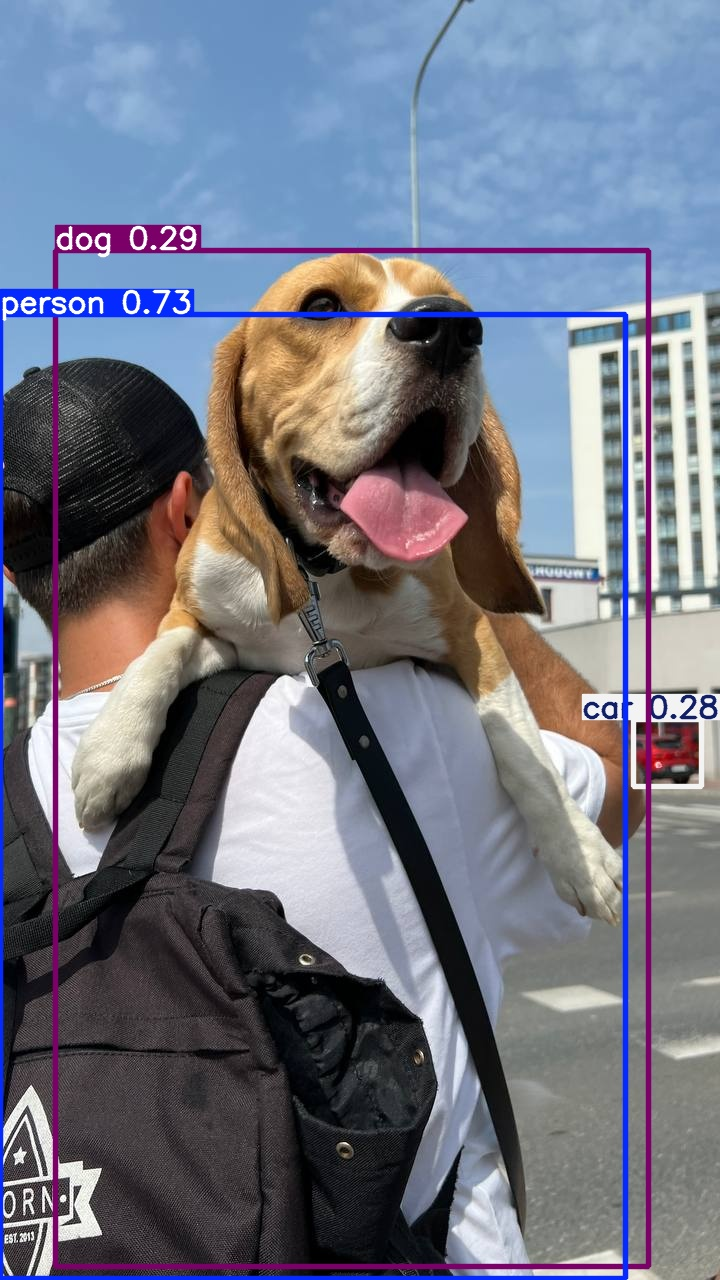

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

python skd env

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 50.1ms
Speed: 2.4ms preprocess, 50.1ms inference, 548.0ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="gHmswJhErzQ5kT2JzMqf")
project = rf.workspace("xavier-ciphf").project("crash-detection-th0fr")
version = project.version(2)
dataset = version.download("yolov5")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Crash-Detection-2 in yolov5pytorch:: 100%|██████████| 5910/5910 [00:01<00:00, 5066.43it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/Crash-Detection-2/data.yaml epochs=50 optimizer='SGD' lr0=0.000909 momentum=0.9  plots=True

/content
New https://pypi.org/project/ultralytics/8.3.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Crash-Detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


/content


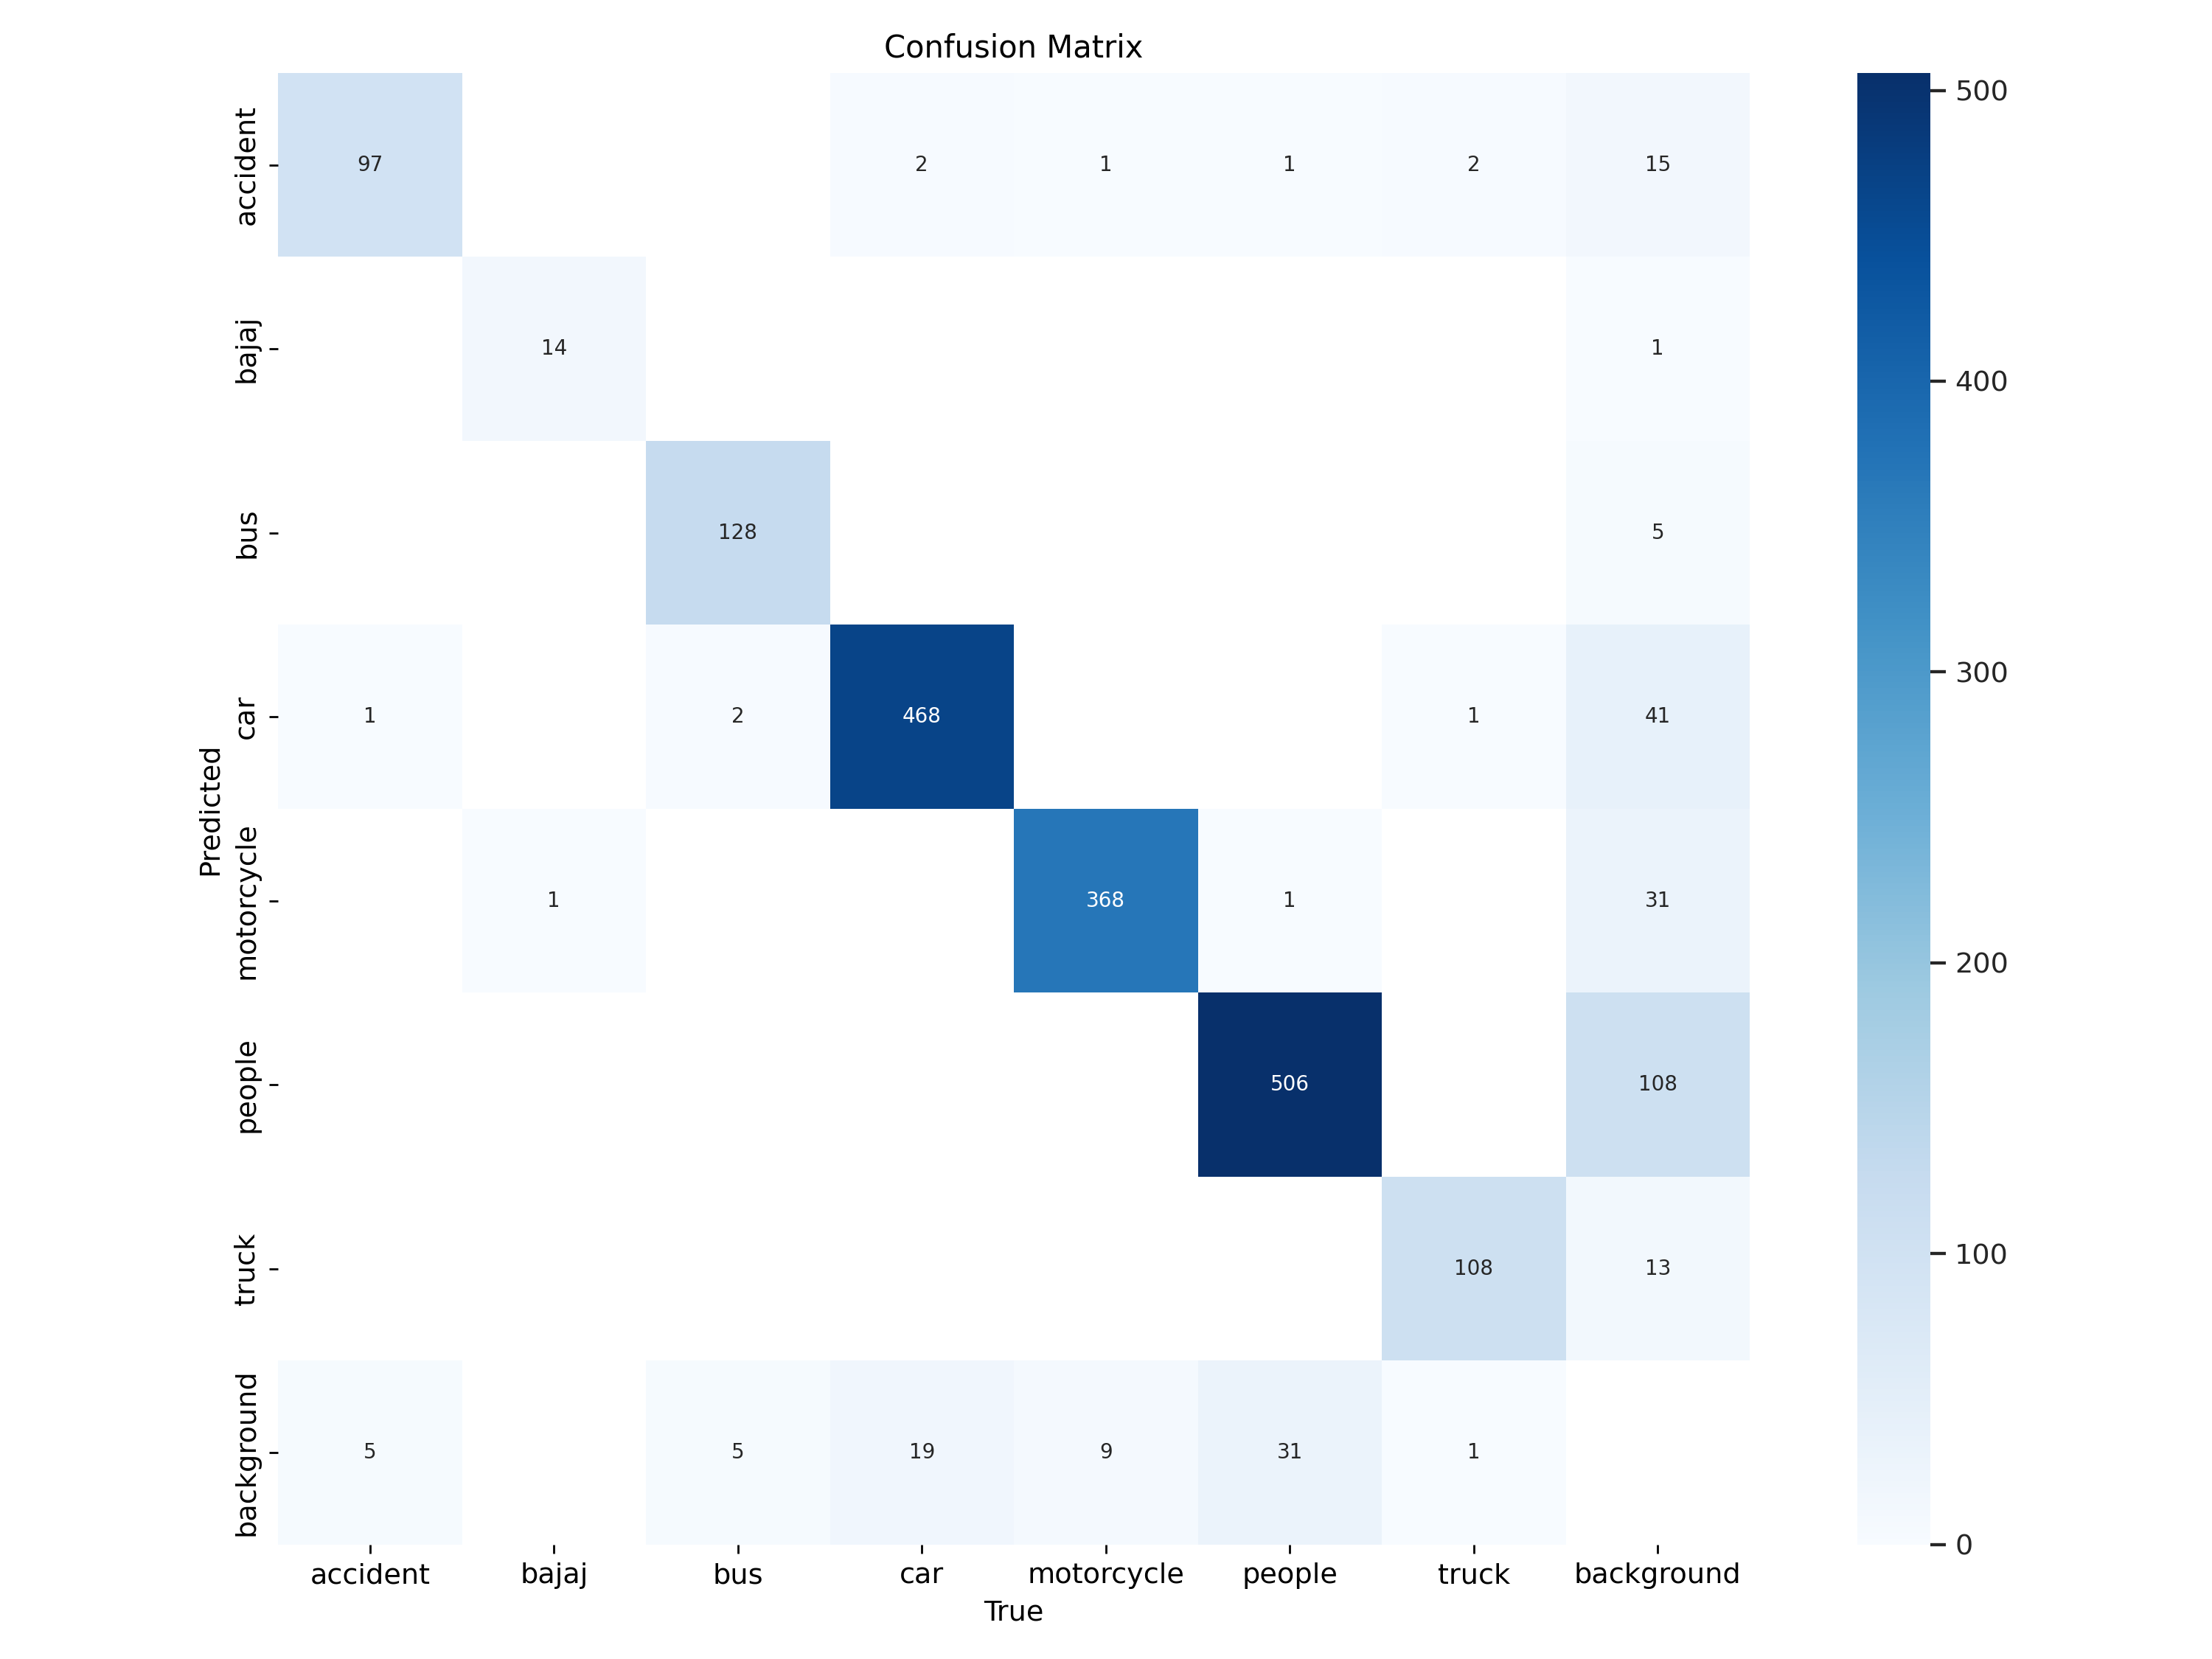

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

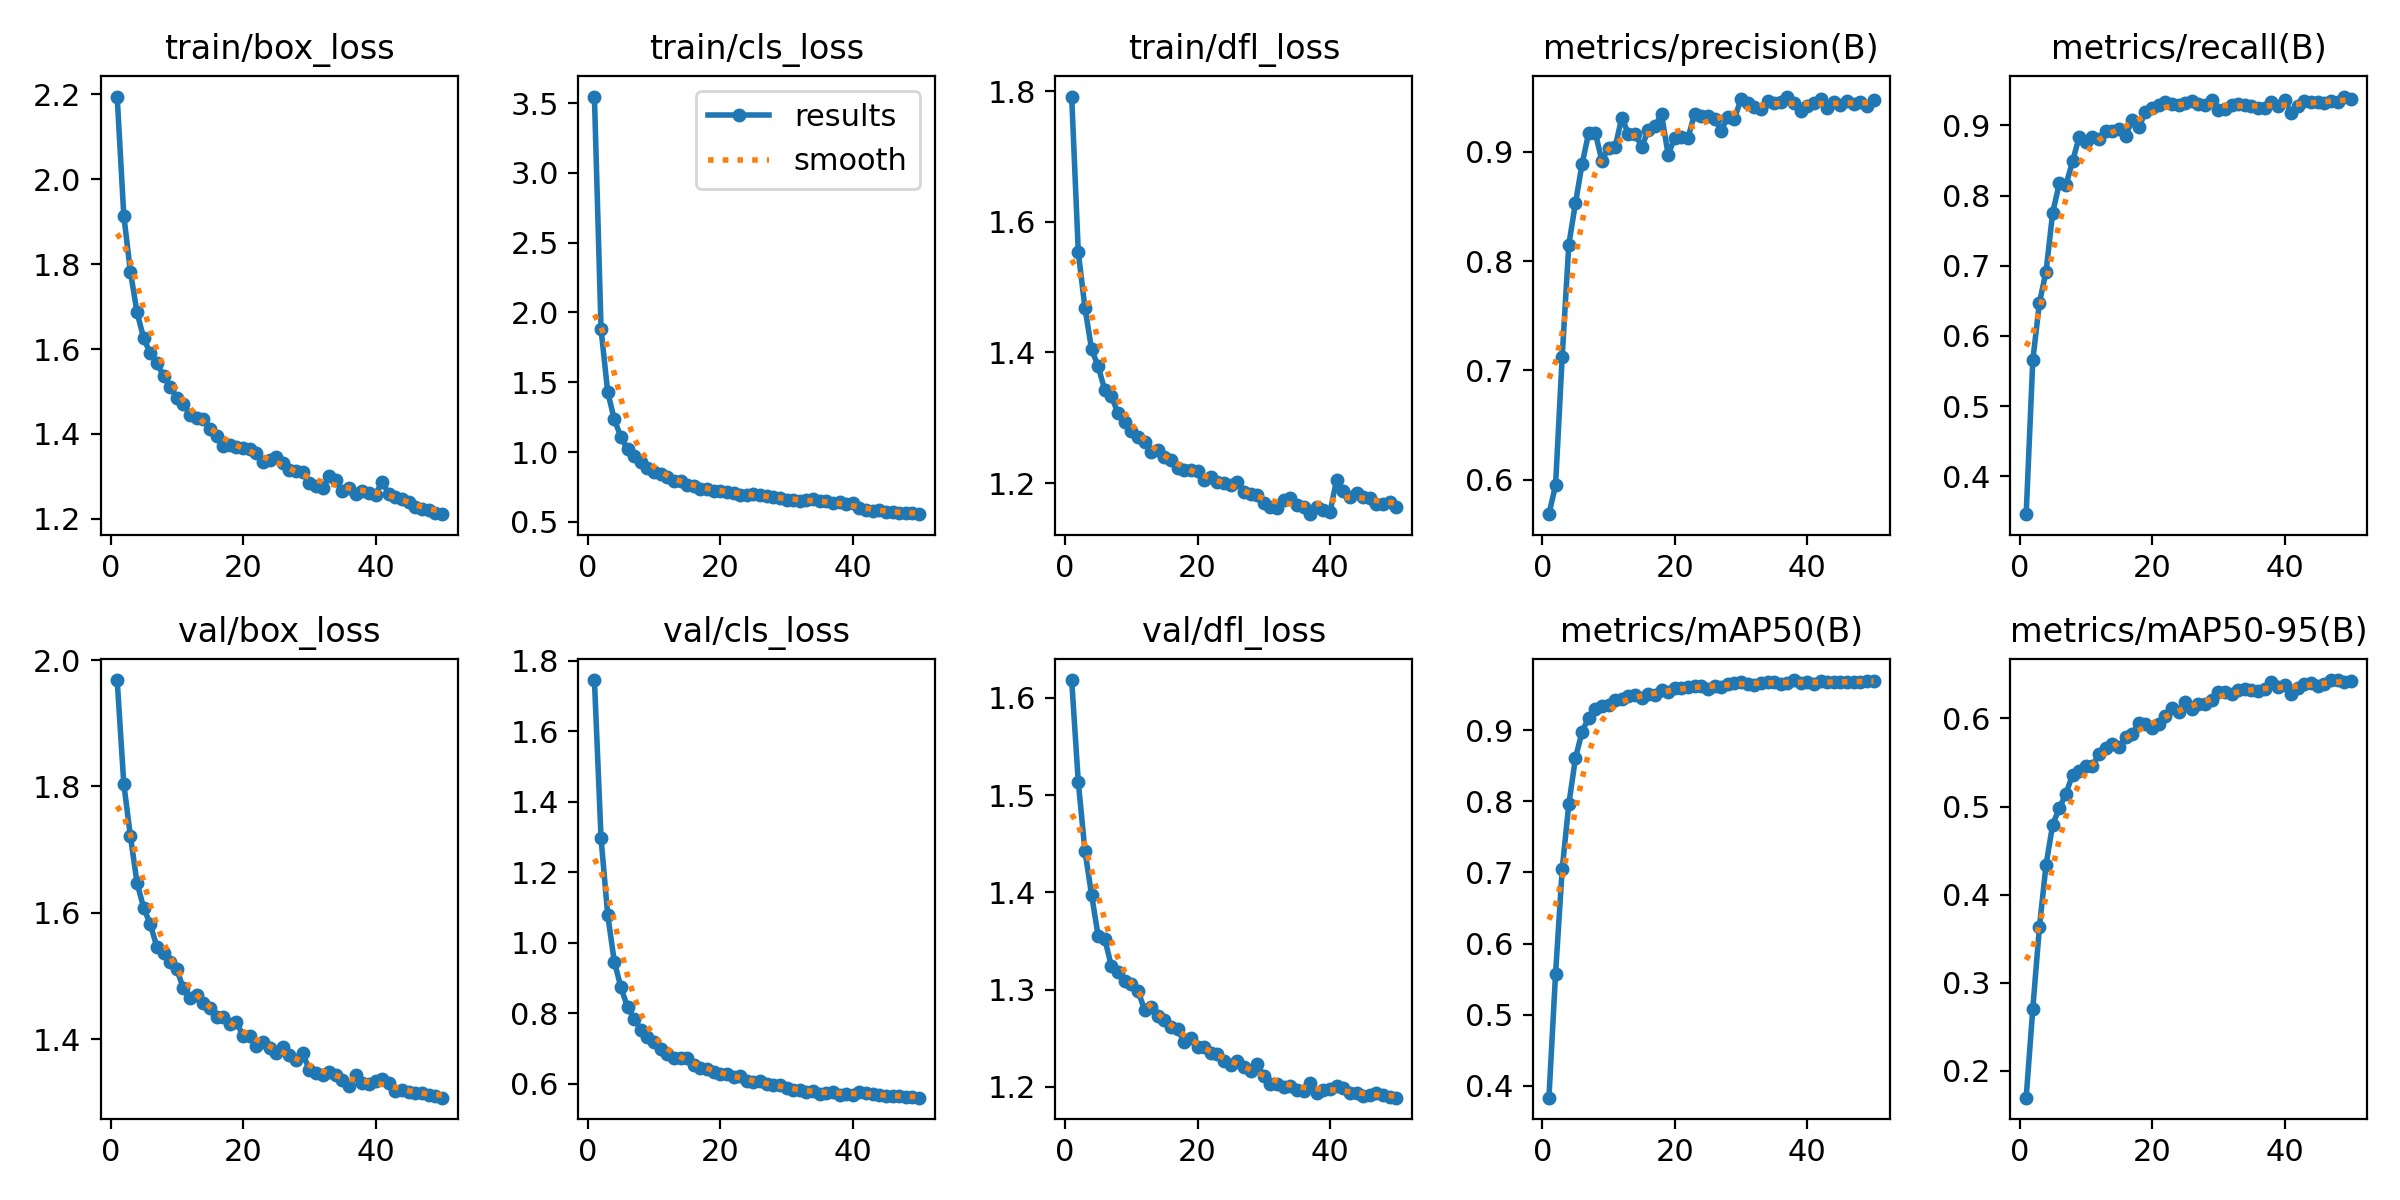

In [ ]:
 {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


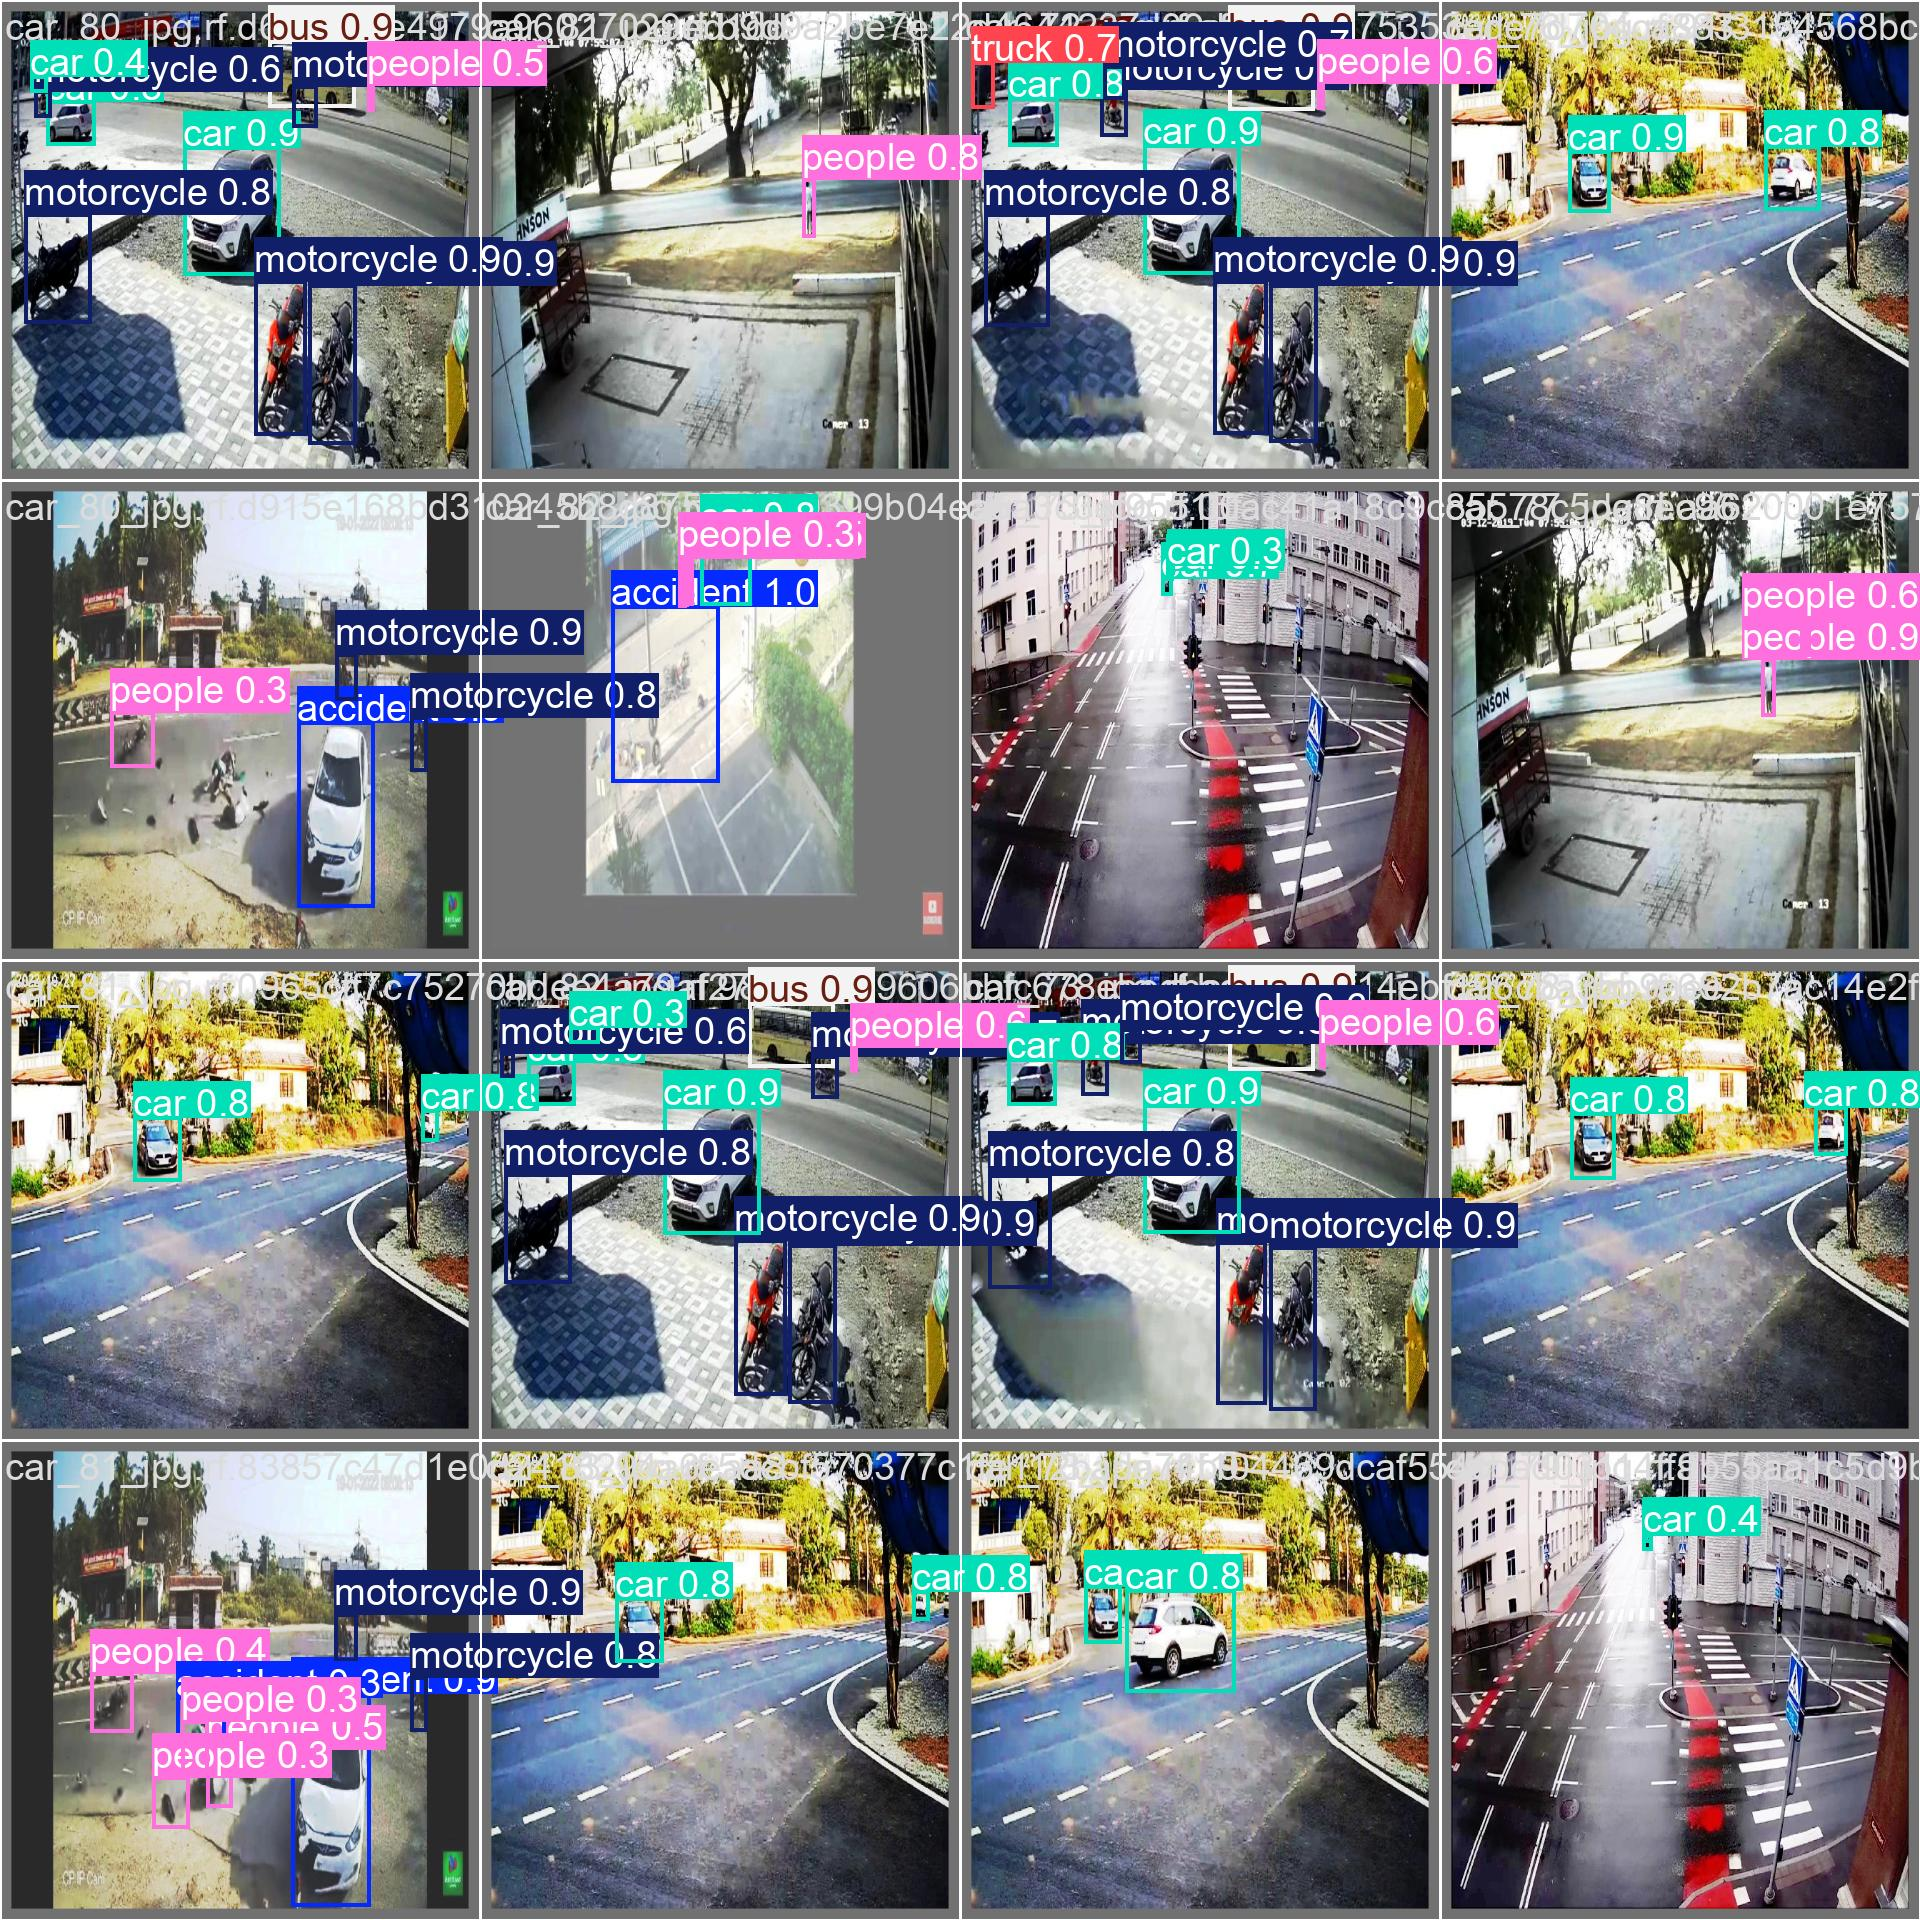

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

validate custom model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Crash-Detection-2/valid/labels.cache... 435 images, 0 backgrounds, 0 corrupt: 100% 435/435 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 28/28 [00:07<00:00,  3.58it/s]
                   all        435       1771      0.944      0.935      0.968      0.643
              accident        103        103      0.904      0.917      0.971      0.758
                 bajaj         15         15      0.997          1      0.995      0.654
                   bus        127        135      0.988      0.933      0.958      0.681
                   car        285        489      0.935       0.93      0.966      0.621
            motorcycle        163        378      0.943      0.955      0.977       0.62
                peopl

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

image 1/160 /content/datasets/Crash-Detection-2/test/images/car_103_jpg.rf.5a08df63cf08e52e8bdf42ac96de85ab.jpg: 640x640 1 accident, 7 cars, 1 truck, 16.3ms
image 2/160 /content/datasets/Crash-Detection-2/test/images/car_108_jpg.rf.1a3229160097e38ad9b25993fb28725a.jpg: 640x640 1 accident, 7 cars, 1 truck, 16.3ms
image 3/160 /content/datasets/Crash-Detection-2/test/images/car_109_jpg.rf.b039b5356b74db1feaa3c6e60e665537.jpg: 640x640 1 accident, 7 cars, 1 truck, 16.2ms
image 4/160 /content/datasets/Crash-Detection-2/test/images/car_110_jpg.rf.37373733f43620165f3c9ea55f62b513.jpg: 640x640 1 accident, 6 cars, 1 truck, 16.2ms
image 5/160 /content/datasets/Crash-Detection-2/test/images/car_111_jpg.rf.36cf0fef76a478c4dab5af74b97075a8.jpg: 640x640 1 accident, 6 cars, 1 truck, 16.2ms
image 6/160 /content/datasets/Crash

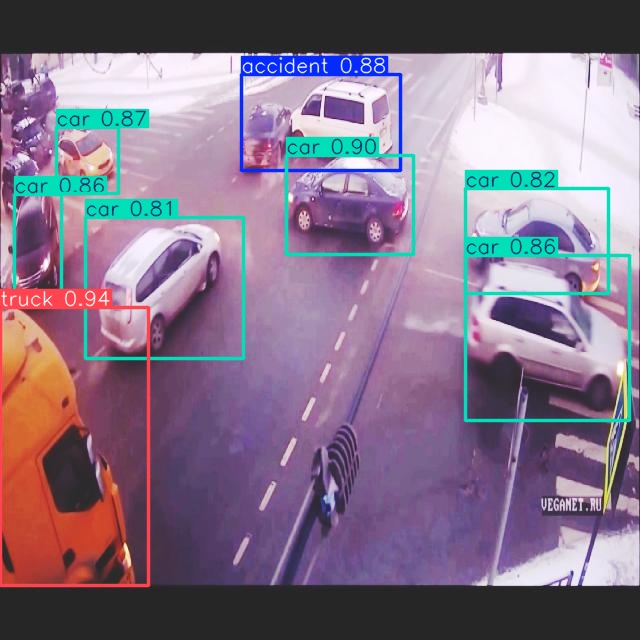

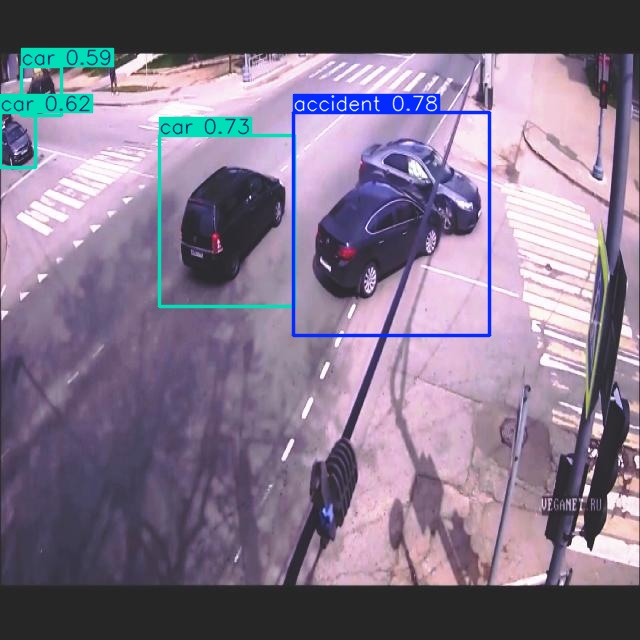

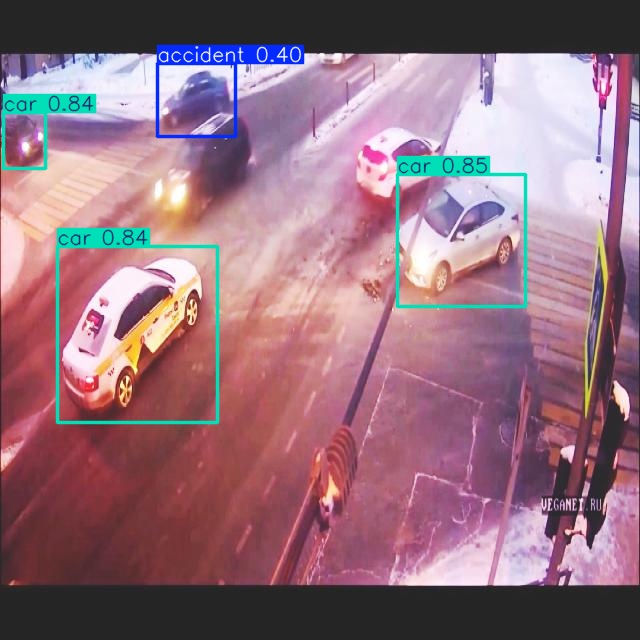

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")